# Beginner Guide to using Cédric's code to treat IR code

In case of anything, you can contact me on my [github page](https://github.com/cedleau/)

## Imports regular packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os, sys, copy, warnings, time, math, pickle, locale, cycler, copy
from datetime import datetime, timedelta, timezone
from zoneinfo import ZoneInfo
from pathlib import Path

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize, TABLEAU_COLORS
import matplotlib.colors as mcolors
from matplotlib import rcParams
from matplotlib.ticker import NullFormatter, FixedLocator, AutoMinorLocator, FuncFormatter
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

from scipy.misc import derivative
from scipy import ndimage, misc, stats, signal, interpolate
from scipy.interpolate import interp1d, PchipInterpolator

from sklearn.linear_model import LinearRegression
import sklearn

from IPython.display import Markdown, display
from cycler import cycler

import opusFC
import spectrochempy as scp
from spectrochempy import NDDataset
scp.set_loglevel('DEBUG')

import octavvs.algorithms.atm_correction
from pybaselines import Baseline, utils
import pybaselines.polynomial

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.6.7.dev8© Copyright 2014-2024 - A.Travert & C.Fernandez @ LCS


In [2]:
%matplotlib inline
plt.style.use('default')
plt.style.use('seaborn-v0_8-notebook') # 'seborn-paper'default
rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

## Imports of custom code

In [3]:
from classes import EC_file3, time_IR_spectra3, load_water_vapor_references, OperandoExperimentSimple, interpolate_spectra

#if not 'data' in os.listdir('.'): warnings.warn(f'data folder is missing, you should maybe unzip data.zip')
#if not 'compute_results' in os.listdir('.'): os.mkdir('compute_results')

I coded three [classes](https://docs.python.org/3/tutorial/classes.html) to import EC-lab export files (`EC_file3`) and successive IR spectra (`time_IR_spectra3`).

You can import `EC_file3` and `time_IR_spectra3` on their own, but given that your data is well organized, `OperandoExperimentSimple` will import both, merged ec files if there are several and make sure all files share the same reference time.

In [4]:
print(EC_file3), print(time_IR_spectra3), print(OperandoExperimentSimple)

<class 'classes.EC_file3'>
<class 'classes.time_IR_spectra3'>
<class 'classes.OperandoExperimentSimple'>


(None, None, None)

## Defining path where the data is stored

These paths are defined in the file `path.py` and imported here. You may modify it to adapt to the location of your data. This is its content:

In [5]:
%pycat path.py

from pathlib import Path

# Path to the directory where can be found the operando cell data
operando_path = Path('../DATA')

# Path to the directory where can be found the reference spectra for water vapour
waterVapour_path = Path('../DATA/DTGS_vapour')


In [6]:
from path import operando_path, waterVapour_path

## Imports of reference spectra

This is water vapor reference spectra used for water vapor correction.

<_Axes: xlabel='Wavenumbers $\\mathrm{/\\ \\mathrm{cm}^{-1}}$', ylabel='Absorbance $\\mathrm{}$'>

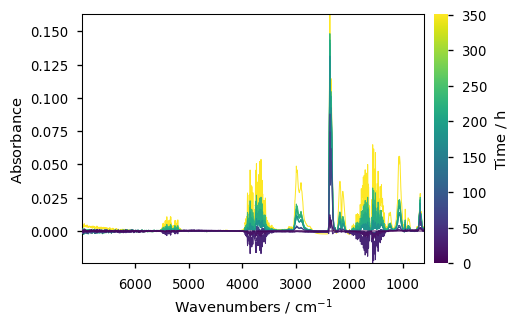

In [7]:
tir_dtgs = load_water_vapor_references(waterVapour_path)
tir_dtgs.NdAB.plot()

## Importing Operando Data

First, let's create a dictionnary Operando where we can store all our cells when imported:

In [8]:
Operando={}

We also import `Operando_Summary_Paper.xlsx`
Note that this excel file is opened with [`pandas` module](https://pandas.pydata.org/) which is really useful to manipulate this kind of data, [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) is a cheatsheet for this.

In [9]:
OperandoSummary=pd.read_excel(operando_path/'Operando_Summary.xlsx')
OperandoSummary.set_index('Name', inplace=True)
OperandoSummary

,Tag For Paper,Short-Description,Cathode,Deposotion,Electrolyte,Anode
Name,,,,,,
F1-112,Cu Pvdf - LP30,Cu - LP30,Cu Pvdf,NaN,LP30 Dodo,Li Metal


As you can see, we have listed one cell, that named 'F1-112', it is its identifier. You should have a data folder with the same name there in `operando_path`:

In [10]:
os.listdir(operando_path)

['.ipynb_checkpoints', 'DTGS_vapour', 'F1-112', 'Operando_Summary.xlsx']

This folder contains several subfolder:

In [11]:
print(os.listdir(operando_path/'F1-112'))

['ec', 'ec_other', 'IR', 'ir_exsitu', 'IR_OPERANDO', 'IR_OPERANDO_csv']


- `'ec'`: you should put here the EC-Lab files for **operando** experiment. The file. Make sure you exported it with 'absolute time' and 'with header' open in  EC-Lab. This file has actually only been tested for GCPL technique.
- `ec_other`: just to store other EC-Lab files that the programm will no read 
- `IR`: to store and import OPUS files that are not operando, like initial spectrum
- `ir_exsitu`: just to store other ex-situ spectra related to the cell,  that the programm will no read 
- `IR_OPERANDO`: THIS IS WERE TO PUT THE OPUS OPERANDO SPECTRA
- `IR_OPERANDO_csv`: this is just an initially empty folder where the program can export spectra in .csv

This is where we import the operando experiment:
```python
OperandoExperimentSimple(operando_type='F1', num=112, ref_datetime=None)
```
- `operando_type`and `num` make up the unique id of the cell
- `ref_datetime` is an optional parameter to set yourself the reference begining time for the experiment. If you put some values, it should be formatted as follow : `datetime.datetime(2023, 8, 22, 9, 56, 52, 544000, tzinfo=datetime.timezone.utc)`

In [12]:
Lnum = [112]
for num in Lnum:
    print(num)
    # Initialize experiment:
    op=OperandoExperimentSimple(operando_type='F1', num=112, ref_datetime=None)
    # Import EC-Lab file and spectra:
    op.routine_import()
    # Import EC-Lab file and spectra: associates
    # the corresponding line of Operando_Summary
    # spreadsheet:
    op.summary=OperandoSummary.loc[op.cell_id,:]
    # Store the experiment in the `Operando` dictionnary
    Operando[num]=op

112


 DEBUG | Bruker OPUS import
 DEBUG | Bruker OPUS import
 DEBUG | Bruker OPUS import


From this point we can access to the operando spectra and EC-Lab files:

In [13]:
num = 112
Operando[num].tir, Operando[num].ec

(Opus time_IR_spectra2 started on 2023-08-22 09:56:52.544000+00:00 with PKA6766,
 EC-Lab File 2023-08-22_F1-112_0_CopperPowderPvdf_LP30_LiMetal_operando_C02.txt)

`Operando[num].tir` is the time infrared with 
- tir.`AB` : 2D numpy array containing the spectra
- tir.`Lth` : 1D numpy array containing the list of times (in hours)
- tir.`Lwn` : 1D numpy array containing the list of wavenumbers.

See:

In [14]:
tir = Operando[num].tir
tir.AB, tir.Lth,  tir.Lwn, 

(array([[ 0.03638,  0.01873, ...,  -0.2661,   -0.404],
        [-0.01087, -0.02913, ...,  -0.3091,  -0.3777],
        ...,
        [-0.05195,  -0.0507, ...,  0.02117, -0.09339],
        [ 0.03797,  0.01537, ..., -0.08824,  -0.2539]], dtype=float32),
 array([       0,   0.3333, ...,       13,    13.33]),
 array([    6997,     6996, ...,    600.5,      599]))

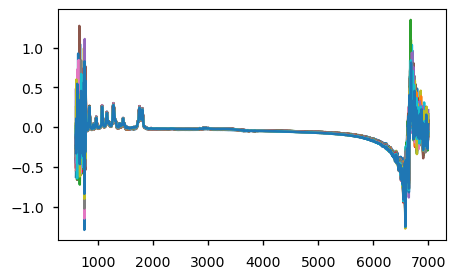

In [15]:
_ = plt.figure(figsize=(5,3)), plt.plot(tir.Lwn, tir.AB.T)

We plotted it but it is not so practical. Instead let's, the import function also put the data in a `NDDataset` object by [`spectrochempy` modules](www.spectrochempy.fr) where you can find documentation on how to use it in details.

Here is what it's look like:

In [16]:
Operando[num].tir.NdAB

name,NDDataset_fd50ddd5
author,cedric.leau@CDF-72FNBH2
created,2024-07-11 17:55:24+02:00
DATA,
title,Absorbance
values,[[ 0.03638 0.01873 ... -0.2661 -0.404] [-0.01087 -0.02913 ... -0.3091 -0.3777] ... [-0.05195 -0.0507 ... 0.02117 -0.09339] [ 0.03797 0.01537 ... -0.08824 -0.2539]]
shape,"(y:41, x:4487)"
DIMENSION `x`,
size,4487
title,Wavenumbers
coordinates,[ 6997 6996 ... 600.5 599] cm⁻¹


<_Axes: xlabel='Wavenumbers $\\mathrm{/\\ \\mathrm{cm}^{-1}}$', ylabel='Absorbance $\\mathrm{}$'>

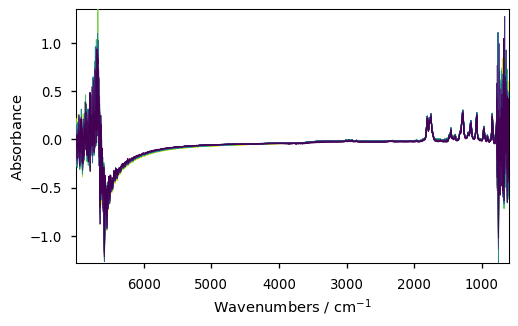

In [17]:
Operando[112].tir.NdAB.plot()

<_Axes: xlabel='Wavenumbers $\\mathrm{/\\ \\mathrm{cm}^{-1}}$', ylabel='Absorbance $\\mathrm{}$'>

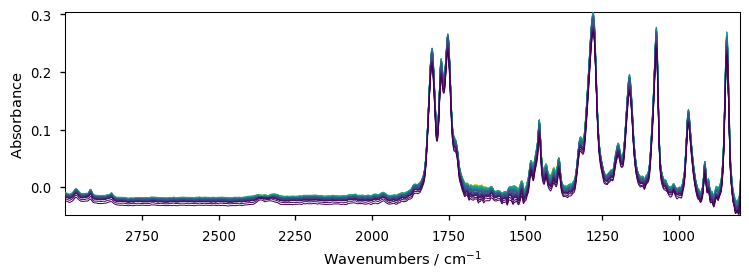

In [18]:
# We can easily sectect wavenumber range:
Operando[112].tir.NdAB[:, 3000.:800.].plot(figsize=(8,3))

In [19]:
# We can easily access the numpy array underlying the data:
Operando[112].tir.NdAB[:, 3000.:800.].data

array([[-0.02332, -0.02372, ...,  -0.0316, -0.01928],
       [-0.01981, -0.02011, ..., -0.02337, -0.009709],
       ...,
       [-0.01325, -0.01361, ..., -0.01844, -0.006214],
       [-0.01329, -0.01351, ..., -0.02014, -0.009999]])

## Pre-Processings Operando Data
From there, we can perform water vapour correction using code from [`octavvs` module](https://pypi.org/project/octavvs/) and baselining using  [`pybaselines` module](https://pypi.org/project/pybaselines/).


In [20]:
for num in Lnum:
    print(num)
    tir=Operando[num].tir

    NdAB=tir.NdAB.copy()
    
    # Water vapour correction and store it in
    # tir.NdAB_vapCorr
    atm = interpolate_spectra(NdAB.x.data, tir_dtgs.Lwn, tir_dtgs.NdAB[2, :].data)
    NdAB.data=octavvs.algorithms.atm_correction.atmospheric(wn=NdAB.x.data, y=NdAB.data, atm=atm)[0]
    NdAB.history='Correct Water Vapour' 
    #ax = NdAB[:, 4000.:800.].plot(figsize=(8,3), title=f"{Operando[num].cell_id} - Original Data")
    tir.NdAB_vapCorr = NdAB.copy()
    # --------------------------------------------- #
    
    # FIRST BASELINE:
    # Fitting spectra with a fist order polynomial (so a line)
    # in fitting_range and store it in tir.NdAB_scp
    x=NdAB.x.data
    fitting_range = ( ((x < 2700) & (x > 2420)) | ((x < 2220) & (x > 2000)) )
    weights = np.zeros_like(x)
    weights[fitting_range] = 1
    baseline_ = np.zeros_like(NdAB.data)
    for k, y in enumerate(NdAB.data):
        baseline_[k] = pybaselines.polynomial.poly(y, x, poly_order=1, weights=weights)[0]
    NdAB.data = NdAB.data - baseline_
    NdAB.history='First order baseline'
    #ax = NdAB[:, 4000.:800.].plot(figsize=(8,3), title=f"{Operando[num].cell_id} - 1st order baseline")    
    tir.NdAB_scp = NdAB.copy()
    # --------------------------------------------- #
    
    # SECOND BASELINE:
    # Calculating A(t)-A(t_0) and fitting spectra
    # with a second order polynomial and store it
    # in tir.NdAB_var_SEI.
    # Note that the regions where we are fitting,
    # defined in weights were chosen considering,
    # the kind of experiment we are doing, you might
    # have to change it
    NdAB = tir.NdAB_scp - tir.NdAB_scp[0]
    weights = np.zeros_like(x)
    weights[(x < 2000.) & (x > 1900.)] , weights[(x < 1580.) & (x > 1570.)] , weights[(x < 940.) & (x > 925.)] = 1, 10, 5
    baseline_ = np.zeros_like(NdAB.data)
    for k, y in enumerate(NdAB.data):
        baseline_[k] = pybaselines.polynomial.poly(y, x, poly_order=2, weights=weights)[0]
    NdAB.data = NdAB.data - baseline_    
    NdAB.history='Second order baseline, adapted for SEI'
    #ax = NdAB[:, 2000.:800.].plot(figsize=(8,3), title=f"{Operando[num].cell_id} - 2nd order baseline - SEI")
    tir.NdAB_var_SEI = NdAB.copy()


112


## Example of plotting the data we juste cleaned

In [21]:
num=112

<_Axes: xlabel='Wavenumbers $\\mathrm{/\\ \\mathrm{cm}^{-1}}$', ylabel='Absorbance $\\mathrm{}$'>

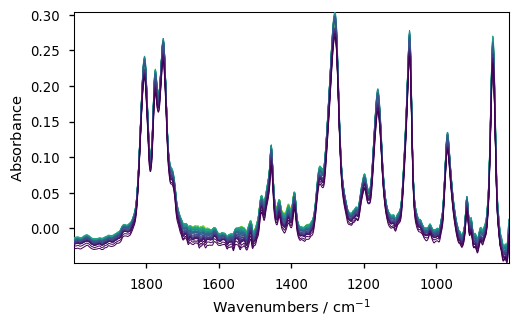

In [22]:
Operando[num].tir.NdAB[:, 2000.:800.].plot()

<_Axes: xlabel='Wavenumbers $\\mathrm{/\\ \\mathrm{cm}^{-1}}$', ylabel='Absorbance $\\mathrm{}$'>

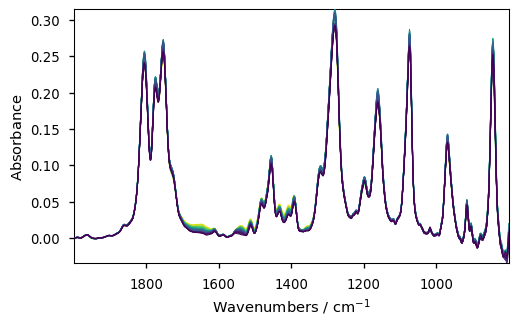

In [23]:
Operando[num].tir.NdAB_scp[:, 2000.:800.].plot()

<_Axes: xlabel='Wavenumbers $\\mathrm{/\\ \\mathrm{cm}^{-1}}$', ylabel='Absorbance $\\mathrm{}$'>

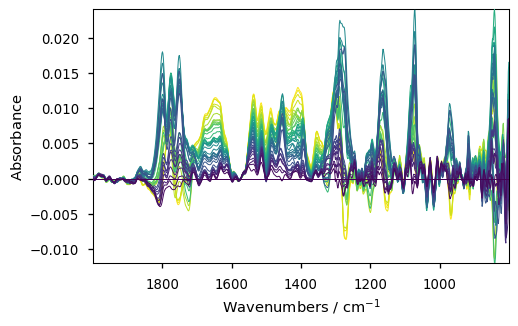

In [24]:
Operando[num].tir.NdAB_var_SEI[:, 2000.:800.].plot()

---
Displaying the evolution of two wavenumbers, compared with voltage curve.
Note the `ec.plot_OCV` function to highlight the 

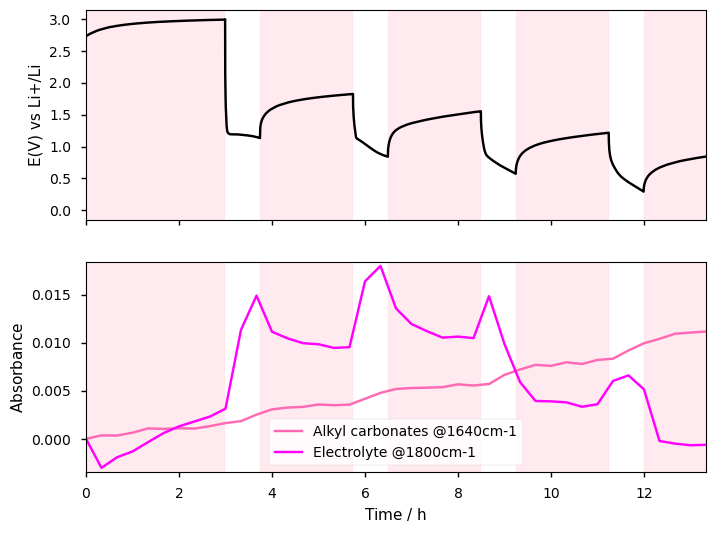

<Figure size 528x336 with 0 Axes>

<Figure size 528x336 with 0 Axes>

In [25]:
fig, axs = plt.subplots(2,1, figsize=(8,6), sharex=True)

ax=axs[0]
op.ec.df.plot(x='time/h', y='Ewe/V', color='k', ax=ax, legend=False)
op.ec.plot_OCV(ax=ax, color='pink')
ax.set_ylabel('E(V) vs Li+/Li')
ax=axs[1]
tir.NdAB_var_SEI[:, 1640.].plot(ax=ax, color='hotpink', label='Alkyl carbonates @1640cm-1')
tir.NdAB_var_SEI[:, 1800.].plot(ax=ax, color='magenta', label='Electrolyte @1800cm-1')

ax.legend(loc='lower center')
op.ec.plot_OCV(ax=ax, color='pink')

fig.savefig(f'export/{Operando[num].cell_id}_SelectedWn.png', dpi=600)

---
Exporting the data of these two wavenumbers to a csv, in  `export` folder:

In [26]:
num=112
Lwn = [1800.,1650.]
df2export = np.array([tir.NdAB_var_SEI[:, num].data.squeeze() for num in Lwn]).T
df2export = pd.DataFrame(df2export, columns=Lwn, index= tir.Lth)
df2export.to_csv(f'export/{Operando[num].cell_id}_SelectedWavenumerConcentration.csv')